In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#데이터프레임을 보기 쉽게
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [2]:
#데이터로드
gu=pd.read_csv('gu_total.csv',encoding='euc-kr',index_col=0).reset_index()
gu.head()

,gu_code,gu,emer_cnt,bus_cnt,sub_cnt,drug_cnt,local_tot,local_0_9,local_10_14,local_15_19,local_20_24,local_25_29,local_30_34,local_35_39,local_40_44,local_45_49,local_50_54,local_55_59,local_60_over,foreign_tot,mild_med,etc_med,tot_med,mild_patient,etc_patient,tot_patient,house_cnt,res_tot,res_10,res_20,res_30,res_40,res_50,res_60_over,floating_0,floating_1,floating_22,floating_23,area,area_ratio
0,11250,강남구,3,406,14,247,21481118.75860,1618807.48775,1039519.52395,1448632.49237,1316832.42670,1606318.92178,1666646.96433,2019249.75990,2023859.55348,2204620.29770,1579310.97702,1310085.46235,3647234.87435,441090.12565,88391.40000,259419.40000,347810.80000,6047.40000,6836.60000,12884.20000,187163.26000,448496.01000,109264.98000,61416.63000,70637.67000,84574.09000,67093.64000,55509.00000,70432.59804,49416.48395,163881.24503,112749.23650,39.50000,6.53000
1,11240,강동구,2,462,30,389,16728805.80435,1326538.99220,746530.97598,885278.34558,860864.25985,1064058.79210,1141666.22192,1470338.15020,1412038.05508,1431893.88630,1210718.55845,1292943.32520,3885936.24105,269393.34457,69424.80000,84689.40000,154114.80000,4244.20000,3472.00000,7716.20000,177526.95000,441983.27000,101286.44000,62107.64000,73962.91000,79911.36000,71434.85000,53280.07000,14898.82984,8722.76509,39999.26922,26758.03177,24.59000,4.06000
2,11230,강북구,4,557,35,514,9652571.45600,585273.84082,320218.30777,462637.96360,662929.15083,689647.74795,568989.33595,683092.72785,663125.11333,800503.63205,753988.29425,802122.24000,2660043.11588,161857.70480,42220.60000,18017.60000,60238.00000,3070.00000,1469.00000,4539.20000,138088.67000,329931.84000,64253.68000,44965.70000,57906.19000,54580.34000,50091.12000,58134.81000,4393.82859,2571.42473,10625.87820,7621.95259,23.60000,3.90000
3,11220,강서구,1,656,21,238,17451950.08415,1363816.74137,619674.71097,794855.56942,953114.89368,1483567.31780,1571709.04390,1696169.44505,1438778.31598,1439479.30440,1123000.99218,1201260.02865,3766523.73010,275084.91410,61688.40000,35955.80000,97644.20000,4831.00000,2674.80000,7506.00000,199826.21000,498157.63000,111643.43000,68769.85000,88709.95000,85018.40000,76826.56000,67189.44000,9016.75184,5367.97427,22622.00558,15858.64681,41.45000,6.85000
4,11210,관악구,4,490,10,233,16019984.21388,740819.89985,358629.38418,685310.69402,1561986.85648,2245901.65593,1656360.86090,1404875.69412,1108246.86878,1167138.97808,986384.04990,1010465.18865,3093864.08548,707042.88918,45004.60000,20232.40000,65237.00000,3649.60000,1784.40000,5434.20000,224401.66000,446797.19000,85962.99000,66893.86000,90878.60000,70241.16000,65038.90000,67781.68000,26371.35008,15559.04255,60290.28324,44444.68704,29.57000,4.89000


# 기초분석

### 목적 : 심야약국 입지 선정을 위한 시군구별 중요도 도출

* 심야약국은 현재 구 단위로 최대 2개가 배정되어 있음, 이것은 지역적 특성을 고려하지 않은 비효율적인 입지 기준
* 시군구 단위의 입지 분석을 통해 비효율 적인 이유를 밝히고(EDA), 기준을 제시(군집)

#### 방법 : 클러스터링 기법을 통한 군집분석



* 전처리 한 데이터를 모두 사용하여 클러스터링 수행할 시 낮은 성능을 보임
* 차원의 저주, 다중공선성 등 모델의 성능을 위해 feature를 줄여야 할 필요성
* 유의할 것으로 판단되는 데이터들을 선정 하였음


* 판단 기준 : 심야약국 선정 시 가장 중요한 변수는 심야시간대(22시~25시) 유동인구라고 판단, 이를 중심으로 상관계수 등을 통하여 변수를 선정

* 응급실,버스정류소,약국 수 등의 변수는 유동인구와 관련이 없엇음. (유동인구가 많은 지역이라고 버스정류소 등이 많은 것은 아니다)

* 그렇다고 버스정류소 등이 많은 지역에 약국을 많이 지정해야 하는 것은 아니라고 판단 -> 따라서 변수 제거

* 시간대,연령별대로 나눠진 칼럼들을 그대로 사용하는 경우 vs 통합하여 파생변수로 사용하는 경우 등 여러 가지를 고려


# 상관계수 히트맵

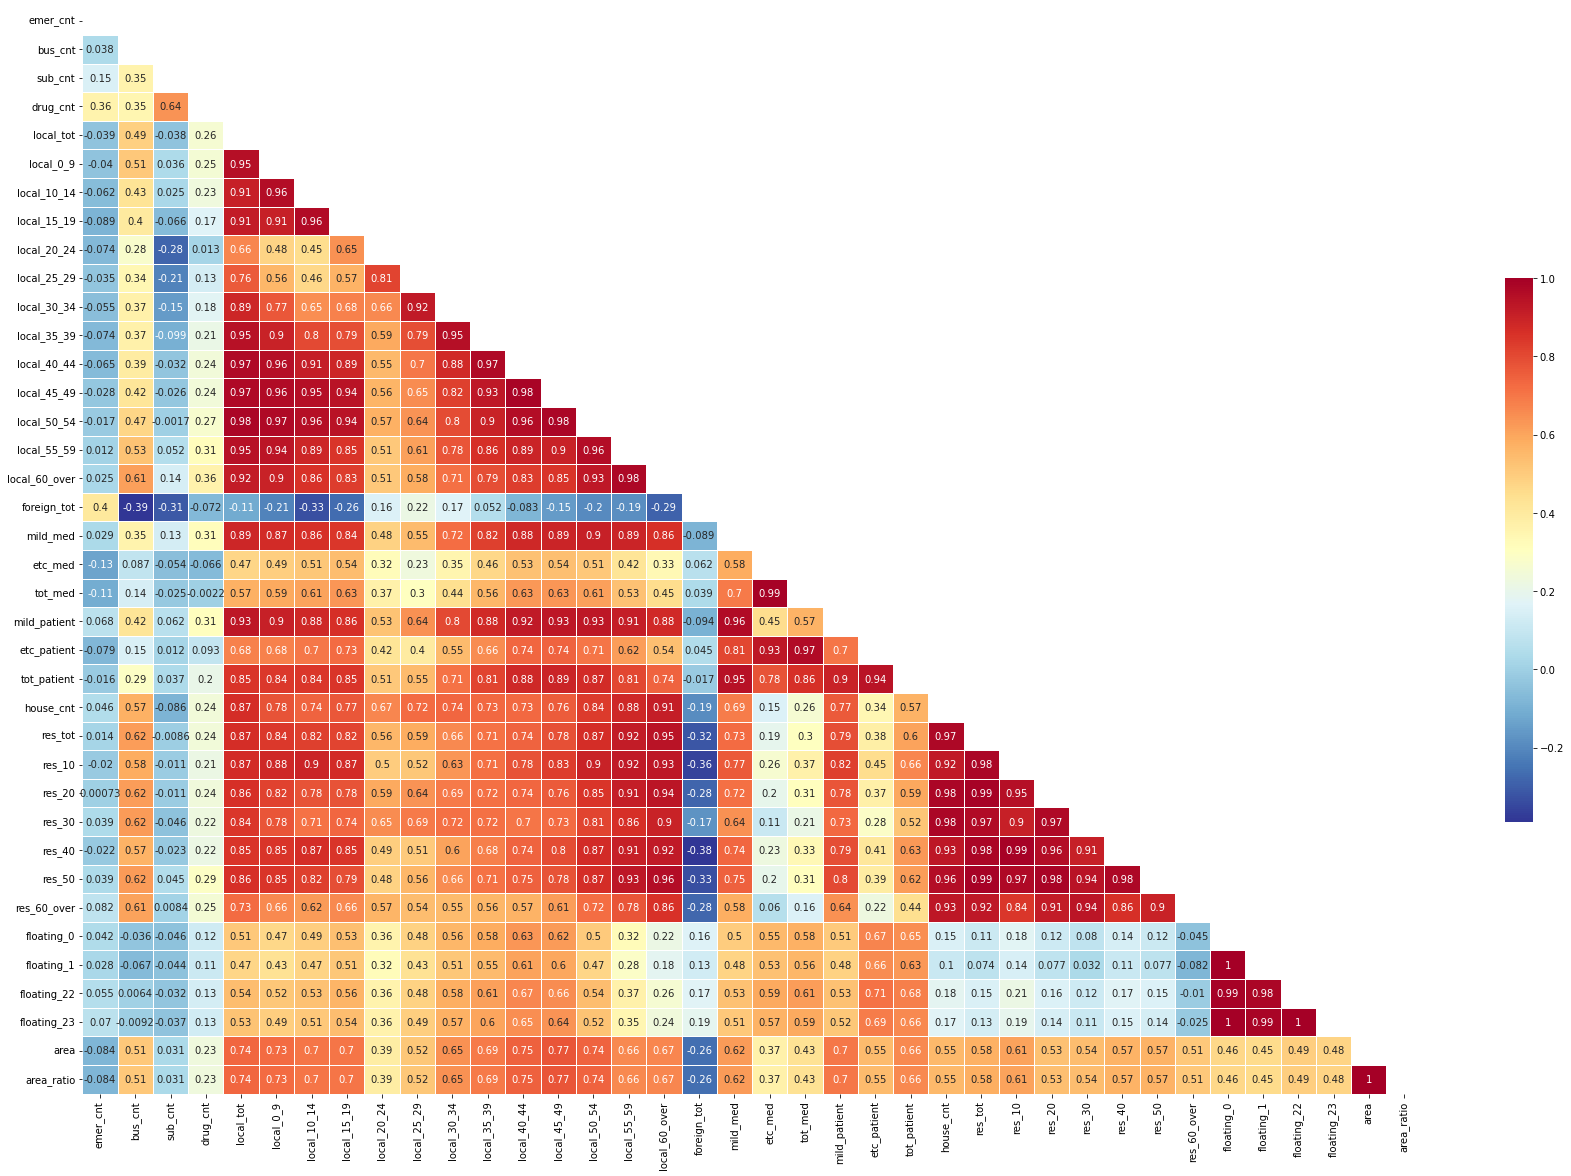

In [3]:
import numpy as np
import seaborn as sns
gu_corr=gu[gu.columns[2:]]
gu_corr=gu_corr.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(30,20) )
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(gu_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 히트맵을 그린다
sns.heatmap(gu_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [4]:
test=pd.DataFrame()
test['gu']=gu['gu']
test['emer_cnt']=gu['emer_cnt']
test['bus_cnt']=gu['bus_cnt']
test['sub_cnt']=gu['sub_cnt']
test['drug_cnt']=gu['drug_cnt']
test['l_f_tot']=gu['local_tot']+gu['foreign_tot']
test['mild_med']=gu['mild_med']
test['mild_patient']=gu['mild_patient']
test['res_tot']=gu['res_tot']
test['floating_avg']=(gu['floating_0']+gu['floating_1']+gu['floating_22']+gu['floating_23'])/4
test['area']=gu['area']
test.head()

,gu,emer_cnt,bus_cnt,sub_cnt,drug_cnt,l_f_tot,mild_med,mild_patient,res_tot,floating_avg,area
0,강남구,3,406,14,247,21922208.88425,88391.40000,6047.40000,448496.01000,99119.89088,39.50000
1,강동구,2,462,30,389,16998199.14892,69424.80000,4244.20000,441983.27000,22594.72398,24.59000
2,강북구,4,557,35,514,9814429.16080,42220.60000,3070.00000,329931.84000,6303.27103,23.60000
3,강서구,1,656,21,238,17727034.99825,61688.40000,4831.00000,498157.63000,13216.34463,41.45000
4,관악구,4,490,10,233,16727027.10305,45004.60000,3649.60000,446797.19000,36666.34073,29.57000


* 상관계수와 변수 통,폐합을 통한 features를 줄인 후, 다시 히트맵을 그림

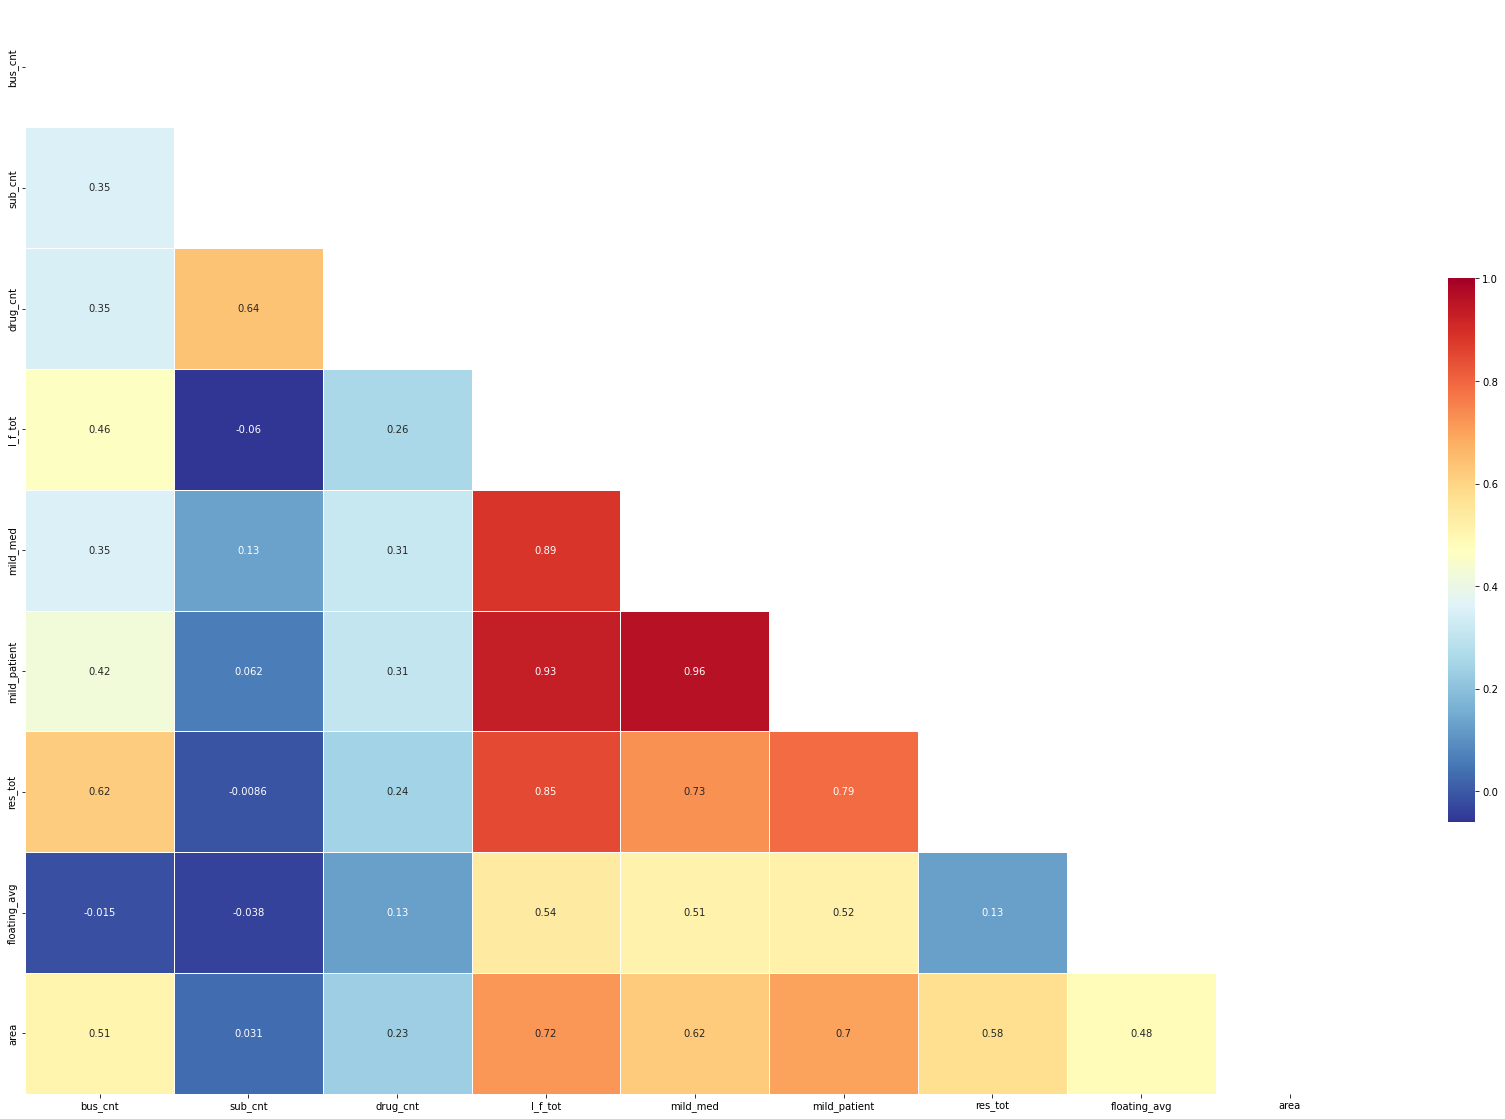

In [5]:
import numpy as np
import seaborn as sns
test=test[test.columns[2:]]
test=test.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(30,20) )
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(test, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 히트맵을 그린다
sns.heatmap(test, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

* 유동인구와 관련이 있는 변수로 내외국인 생활인구,경증환자약재비,경증환자수,지역크기 등을 고려하기로 하였음

### 테스트셋 1(기준)
#### 유동인구 평균 , 경증환자수, 경증약재비, 지역크기

In [6]:
test_1=pd.DataFrame()
test_1['floating_tot']=(gu['floating_0']+gu['floating_1']+gu['floating_22']+gu['floating_23'])
test_1['mild_patient']=gu['mild_patient']
test_1['mild_med']=gu['mild_med']
test_1['area']=gu['area']
test_1['gu']=gu['gu']

### 테스트셋 2
#### 시간대별 유동인구 , 경증환자수, 경증약재비 , 나이대별 거주인구, 지역크기
* 관점1 : 시간대 별로 유동인구를 나누면 유의미한 차이가 나타날 것인가? ( ex) 22시 유동인구가 많은 구역끼리 새로운 클러스터가 생김..)
* 관점2 : 연령대 별 생활인구 변수를 추가하면 연령대에 따른 군집의 유의미한 변동이 일어날 것인가?

In [13]:
test_2=pd.DataFrame()
test_2['floating_0']=gu['floating_0']
test_2['floating_1']=gu['floating_1']
test_2['floating_22']=gu['floating_22']
test_2['floating_23']=gu['floating_23']
test_2['mild_patient']=gu['mild_patient']
test_2['mild_med']=gu['mild_med']
test_2['res_10']=gu['res_10']
test_2['res_20']=gu['res_20']
test_2['res_30']=gu['res_30']
test_2['res_40']=gu['res_40']
test_2['res_50']=gu['res_50']
test_2['res_60_over']=gu['res_60_over']
test_2['area']=gu['area']
test_2['gu']=gu['gu']

* 다중공선성 등 군집이 잘 분할되지 않는 경향을 보임

### 테스트셋 3
### 유동인구 와 내외국인 생활인구를 모두고려
* 관점 : 유동인구와 생활인구를 모두 고려하면 유의미한 차이가 나타날 것인가?

In [160]:
test_3=pd.DataFrame()
test_3['floating_tot']=(gu['floating_0']+gu['floating_1']+gu['floating_22']+gu['floating_23'])
test_3['l_f_tot']=gu['local_tot']+gu['foreign_tot']
test_3['mild_patient']=gu['mild_patient']
test_3['mild_med']=gu['mild_med']
test_3['area']=gu['area']
test_3['gu']=gu['gu']

* 유의미한 차의는 보이지 않았고, 오히려 1번 테스트셋이 더 군집이 잘 설명되는 경향을 보임

### 테스트셋 4
### 경증환자와 경증약재비 중 하나만을 고려
* 관점 : 경증환자와 경증약재비는 높은 상관관계를 보임, 하지만 분석에서 중요한 변수라고 생각 되기에 둘다 고려하고 싶음

In [76]:
test_4=pd.DataFrame()
test_4['floating_tot']=(gu['floating_0']+gu['floating_1']+gu['floating_22']+gu['floating_23'])
test_4['l_f_tot']=gu['local_tot']+gu['foreign_tot']
test_4['mild_patient']=gu['mild_patient']
#test_4['mild_med']=gu['mild_med']
test_4['area']=gu['area']
test_4['gu']=gu['gu']

In [77]:
sample_1=test_1.drop(['gu'],axis=1)
sample_2=test_2.drop(['gu'],axis=1)
sample_3=test_3.drop(['gu'],axis=1)
sample_4=test_4.drop(['gu'],axis=1)

# 분석에 사용할 데이터 셋 선택

In [78]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [139]:
#해당 부분을 바꿔 가면서 분석을 함
sample =sample_4

# 스케일링

In [140]:
scaler = StandardScaler()
scaler.fit(sample)
scaled_sample = pd.DataFrame(scaler.transform(sample),columns= sample.columns )
print("All features are now scaled")

All features are now scaled


In [141]:
print("Dataframe to be used for further modelling:")
scaled_sample.head()

Dataframe to be used for further modelling:


,floating_tot,l_f_tot,mild_patient,area
0,3.74676,2.03539,2.45260,1.67582
1,-0.06042,0.86153,0.74880,0.04156
2,-0.87093,-0.85104,-0.36068,-0.06695
3,-0.52700,1.03529,1.30325,1.88955
4,0.63966,0.79689,0.18697,0.58741


In [142]:
model_sample_kmean=scaled_sample.copy()
model_sample_kMedois=scaled_sample.copy()
model_sample_gmm=scaled_sample.copy()
model_sample_agg=scaled_sample.copy()

# Kmean

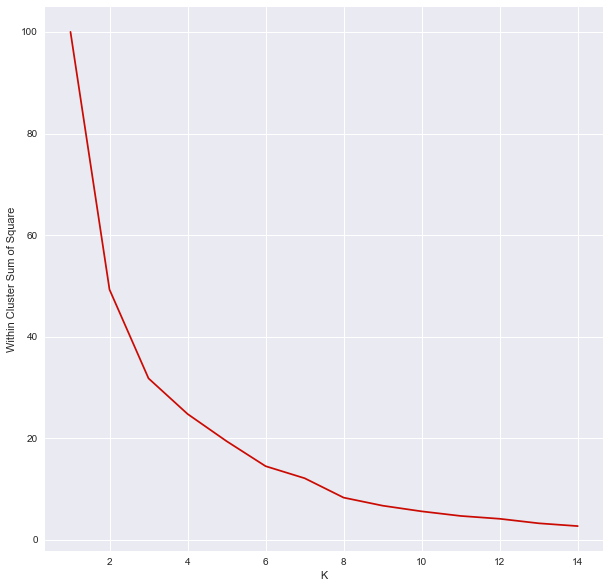

In [143]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = [] 
#Elbow method로 군집수 결정하기
for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(model_sample_kmean)
    inertia.append(kmeansForLoop.inertia_)
    
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), inertia, color='r')
plt.xlabel("K")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

In [144]:
km = KMeans(n_clusters = 3, random_state = 42)
clusters = km.fit_predict(model_sample_kmean)

model_sample_kmean['cluster'] = clusters

In [145]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(model_sample_kmean, model_sample_kmean['cluster'])
print(score_samples.shape)
print(score_samples)
model_sample_kmean['silhoutte_coeff'] = score_samples

(25,)
[ 0.36096769  0.62663855  0.53493845  0.385092    0.55110531  0.53559408
  0.45521017  0.61026334  0.58094976  0.61418509  0.56943727  0.53636149
  0.55161442  0.63222039  0.02354895  0.66279042  0.49712541 -0.04447888
  0.48830321  0.57449479  0.55628115  0.62757581  0.57405143  0.54395283
  0.53073794]


In [146]:
average_score = silhouette_score(model_sample_kmean, model_sample_kmean['cluster'])
print(average_score)
print(model_sample_kmean.groupby('cluster')['silhoutte_coeff'].mean())

0.503720432179708
cluster
0   0.56839
1   0.11335
2   0.53887
Name: silhoutte_coeff, dtype: float64


# K-medois

In [147]:
from sklearn_extra.cluster import KMedoids
km = KMedoids(n_clusters=5)
clusters = km.fit_predict(model_sample_kMedois)
model_sample_kMedois['cluster'] = clusters

In [148]:
score_samples = silhouette_samples(model_sample_kMedois, model_sample_kMedois['cluster'])
print(score_samples.shape)
print(score_samples)
model_sample_kMedois['silhoutte_coeff'] = score_samples

(25,)
[ 0.12236732  0.48641144  0.27972307  0.5115619  -0.10025219  0.40241518
  0.50368124  0.4828246   0.51311623  0.55925785  0.21942565  0.36563944
  0.61291926  0.51028732  0.12918114  0.50192181  0.53843047  0.18229366
  0.44674475 -0.15388086  0.54328996  0.25509602  0.5961888   0.34535793
  0.39213459]


In [149]:
average_score = silhouette_score(model_sample_kMedois, model_sample_kMedois['cluster'])
print(average_score)
print(model_sample_kMedois.groupby('cluster')['silhoutte_coeff'].mean())

0.3686293905468521
cluster
0   -0.00065
1    0.36552
2    0.39084
3    0.49672
4    0.49226
Name: silhoutte_coeff, dtype: float64


# GMM

In [150]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=100)
clusters = km.fit_predict(model_sample_gmm)

model_sample_gmm['cluster'] = clusters

In [151]:
score_samples = silhouette_samples(model_sample_gmm, model_sample_gmm['cluster'])
print(score_samples.shape)
print(score_samples)
model_sample_gmm['silhoutte_coeff'] = score_samples

(25,)
[ 0.12236732  0.48641144  0.27972307  0.5115619  -0.10025219  0.40241518
  0.50368124  0.4828246   0.51311623  0.55925785  0.21942565  0.36563944
  0.61291926  0.51028732  0.12918114  0.50192181  0.53843047  0.18229366
  0.44674475 -0.15388086  0.54328996  0.25509602  0.5961888   0.34535793
  0.39213459]


In [152]:
average_score = silhouette_score(model_sample_gmm, model_sample_gmm['cluster'])
print(average_score)
print(model_sample_gmm.groupby('cluster')['silhoutte_coeff'].mean())

0.3686293905468521
cluster
0   -0.00065
1    0.36552
2    0.39084
3    0.49672
4    0.49226
Name: silhoutte_coeff, dtype: float64


# Agg

Text(0, 0.5, '클러스터 거리')

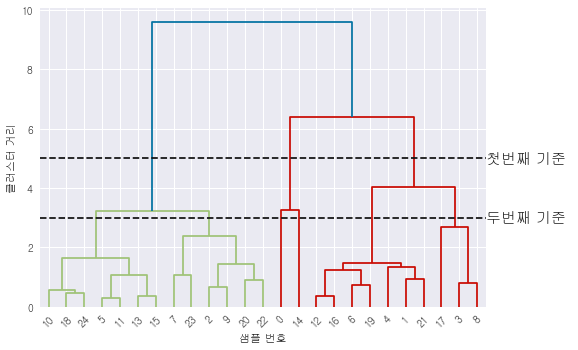

In [153]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(model_sample_agg)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
#눈으로 보고 X,y좌표를 지정하여 클러스터를 구분
ax.plot(bounds, [5, 5], '--', c='k')
ax.plot(bounds, [3, 3], '--', c='k')

ax.text(bounds[1],5, '첫번째 기준 ', va='center', fontdict={'size': 15})
ax.text(bounds[1],3, '두번째 기준 ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

In [154]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6)

clusters = agg.fit_predict(model_sample_agg)

model_sample_agg['cluster']=clusters

In [155]:
score_samples = silhouette_samples(model_sample_agg, model_sample_agg['cluster'])
print(score_samples.shape)
print(score_samples)
model_sample_agg['silhoutte_coeff'] = score_samples

(25,)
[0.         0.53961854 0.29131799 0.38790178 0.46242604 0.76952909
 0.56321069 0.59886824 0.1509589  0.54740382 0.75682968 0.7936146
 0.62353566 0.75903835 0.         0.70628519 0.55163967 0.25539871
 0.77376647 0.62913501 0.54904479 0.44399257 0.57938615 0.46245842
 0.74652272]


In [156]:
average_score = silhouette_score(model_sample_agg, model_sample_agg['cluster'])
print(average_score)
print(model_sample_agg.groupby('cluster')['silhoutte_coeff'].mean())

0.5172353156675755
cluster
0   0.26475
1   0.54479
2   0.50475
3   0.00000
4   0.00000
5   0.75794
Name: silhoutte_coeff, dtype: float64


In [157]:
model_counts = pd.DataFrame()

model_counts['kmean']=model_sample_kmean['cluster'].value_counts().sort_values(ascending=False).reset_index(drop=True)
model_counts['kMedois']=model_sample_kMedois['cluster'].value_counts().sort_values(ascending=False).reset_index(drop=True)
model_counts['gmm']=model_sample_gmm['cluster'].value_counts().sort_values(ascending=False).reset_index(drop=True)
model_counts['agg']=model_sample_agg['cluster'].value_counts().sort_values(ascending=False).reset_index(drop=True)

model_counts.rename(index={0:'top1',1:'top2',2:'top3',3:'top4',4:'top5',5:'top6'})


,kmean,kMedois,gmm,agg
top1,13,6,6,7
top2,9,6,6,7
top3,3,5,5,6


In [158]:
model_sample = pd.DataFrame()
model_sample['kmean_cluster']=model_sample_kmean['cluster']
model_sample['kMedois_cluster']=model_sample_kMedois['cluster']
model_sample['gmm_cluster']=model_sample_gmm['cluster']
model_sample['agg_cluster']=model_sample_agg['cluster']

model_silhouette = pd.DataFrame([silhouette_score(model_sample_kmean, model_sample_kmean['cluster']),
                               silhouette_score(model_sample_kMedois, model_sample_kMedois['cluster']),
                               silhouette_score(model_sample_gmm, model_sample_gmm['cluster']),
                               silhouette_score(model_sample_agg, model_sample_agg['cluster'])]
                                                ,columns=['silhouette'],index=['kmean','kMedois','gmm','agg'])


In [159]:
model_silhouette

,silhouette
kmean,0.50372
kMedois,0.36863
gmm,0.36863
agg,0.51724


* 좋은 성능을 보이는 군집 모델을 선택

# 최종 선택

* 각 케이스 별로 분석한 결과  군집이 가장 잘 나뉜 테스트 셋을 선정
* 피쳐수가 적고 군집이 잘 설명되는 test_1 세트를 선택
* 클러스터 수가 많고 실루엣 계수를 보장하는 agg를 선택
* 모델은 시군구를 심야유동시간대를 가장 중요한 변수로, 경증환자 약재비 및 환자 수 지역크기 등을 고려하여 6개의 그룹으로 나뉨

In [52]:
test_1['cluster']=model_sample_agg['cluster']
test_selected=test_1.copy()
test_selected

,floating_tot,mild_patient,mild_med,area,gu,cluster
0,396479.56353,6047.40000,88391.40000,39.50000,강남구,5
1,90378.89592,4244.20000,69424.80000,24.59000,강동구,2
2,25213.08410,3070.00000,42220.60000,23.60000,강북구,1
3,52865.37851,4831.00000,61688.40000,41.45000,강서구,0
4,146665.36291,3649.60000,45004.60000,29.57000,관악구,2
5,122273.82302,3043.60000,41839.40000,17.06000,광진구,1
6,100587.71952,3773.20000,50974.60000,20.12000,구로구,2
7,46680.37703,2097.60000,27711.20000,13.02000,금천구,4
8,31253.37608,4517.20000,64074.60000,35.44000,노원구,0
9,16831.96374,2501.60000,38377.60000,20.65000,도봉구,1


### 심야시간대 변수와 다른 변수들 간의 관계 파악

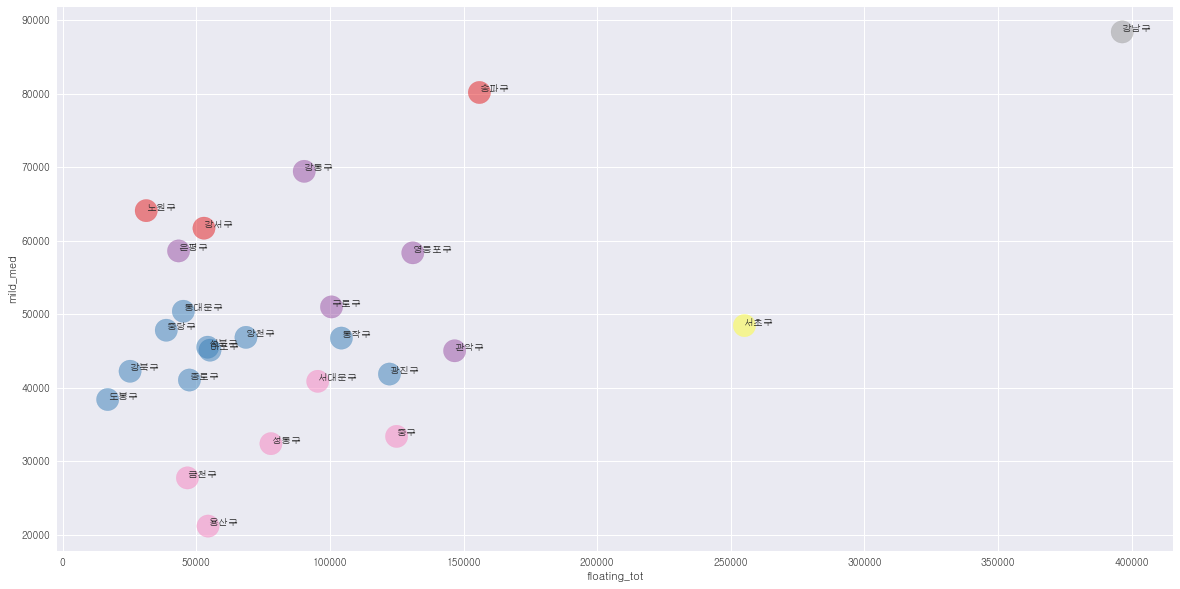

In [53]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


np.random.seed(0)
x = test_selected['floating_tot']
y = test_selected['mild_med']
annotations = test_selected['gu']
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.scatter(x, y, s = 500, c = test_selected['cluster'], marker = 'o', alpha = 0.5, cmap = 'Set1')
ax.set_xlabel('floating_tot')
ax.set_ylabel('mild_med')
for i, label in enumerate(annotations):   
    plt.annotate(label, (x[i], y[i]),size=10)


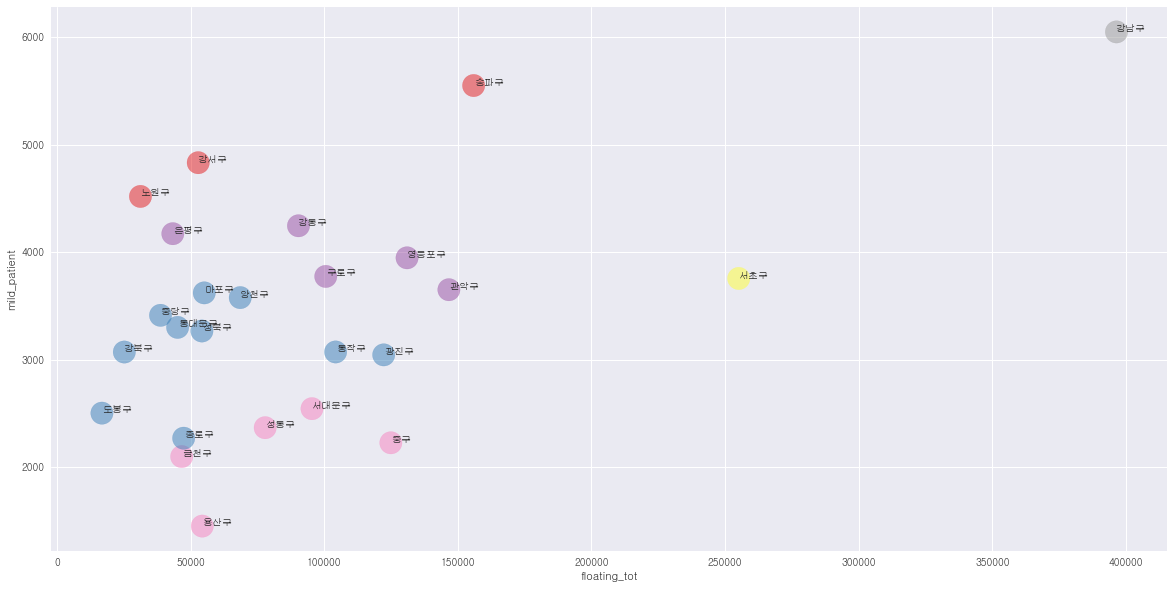

In [54]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


np.random.seed(0)
x = test_selected['floating_tot']
y = test_selected['mild_patient']
annotations = test_selected['gu']
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.scatter(x, y, s = 500, c = test_selected['cluster'], marker = 'o', alpha = 0.5, cmap = 'Set1')
ax.set_xlabel('floating_tot')
ax.set_ylabel('mild_patient')
for i, label in enumerate(annotations):   
    plt.annotate(label, (x[i], y[i]),size=10)

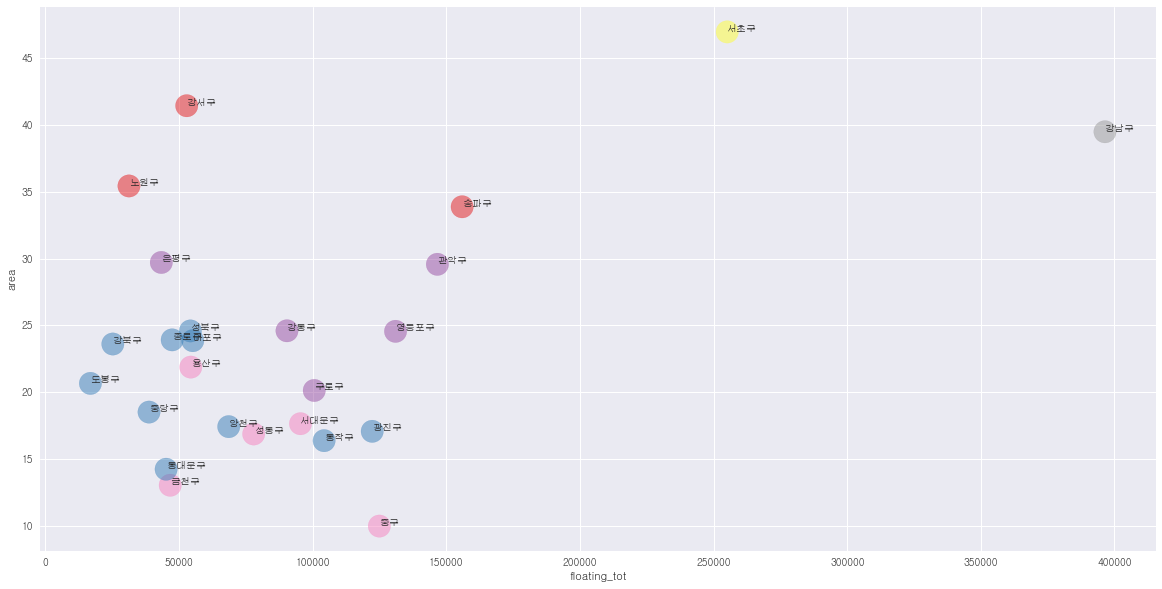

In [64]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


np.random.seed(0)
x = test_selected['floating_tot']
y = test_selected['area']
annotations = test_1['gu']
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.scatter(x, y, s = 500, c = test_1['cluster'], marker = 'o', alpha = 0.5, cmap = 'Set1')
ax.set_xlabel('floating_tot')
ax.set_ylabel('area')
for i, label in enumerate(annotations):   
    plt.annotate(label, (x[i], y[i]),size=10)

* 지역의 크기는 상대적으로 구분하지 못하는 경향을 보이기 때문에 제거하고 싶다


### area변수 제거 후 기존 데이터 셋과 비교

In [56]:
sample_selected = scaled_sample.drop(['area'],axis=1)

In [57]:
model= AgglomerativeClustering(n_clusters = 6)
clusters = model.fit_predict(sample_selected)

sample_selected['cluster'] = clusters

In [58]:
#제거 전후 클러스터 수
model_comp = pd.DataFrame()

model_comp['test_original']=model_sample_agg['cluster'].value_counts().sort_values(ascending=False).reset_index(drop=True)
model_comp['test_selected']=sample_selected['cluster'].value_counts().sort_values(ascending=False).reset_index(drop=True)

model_comp.rename(index={0:'top1',1:'top2',2:'top3',3:'top4',4:'top5',5:'top6'})

,test_original,test_selected
top1,10,9
top2,5,6
top3,5,4
top4,3,4
top5,1,1
top6,1,1


In [59]:
average_score = silhouette_score(model_sample_agg, model_sample_agg['cluster'])
average_score2 = silhouette_score(sample_selected, sample_selected['cluster'])
print("실루엣 계수 보정 전/후\n",average_score,average_score2)


실루엣 계수 보정 전/후
 0.44820488689351984 0.5318211471727937


In [60]:
test_selected['cluster_non_area']=sample_selected['cluster']
test_selected

,floating_tot,mild_patient,mild_med,area,gu,cluster,cluster_non_area
0,396479.56353,6047.40000,88391.40000,39.50000,강남구,5,5
1,90378.89592,4244.20000,69424.80000,24.59000,강동구,2,4
2,25213.08410,3070.00000,42220.60000,23.60000,강북구,1,1
3,52865.37851,4831.00000,61688.40000,41.45000,강서구,0,4
4,146665.36291,3649.60000,45004.60000,29.57000,관악구,2,0
5,122273.82302,3043.60000,41839.40000,17.06000,광진구,1,1
6,100587.71952,3773.20000,50974.60000,20.12000,구로구,2,0
7,46680.37703,2097.60000,27711.20000,13.02000,금천구,4,3
8,31253.37608,4517.20000,64074.60000,35.44000,노원구,0,4
9,16831.96374,2501.60000,38377.60000,20.65000,도봉구,1,3


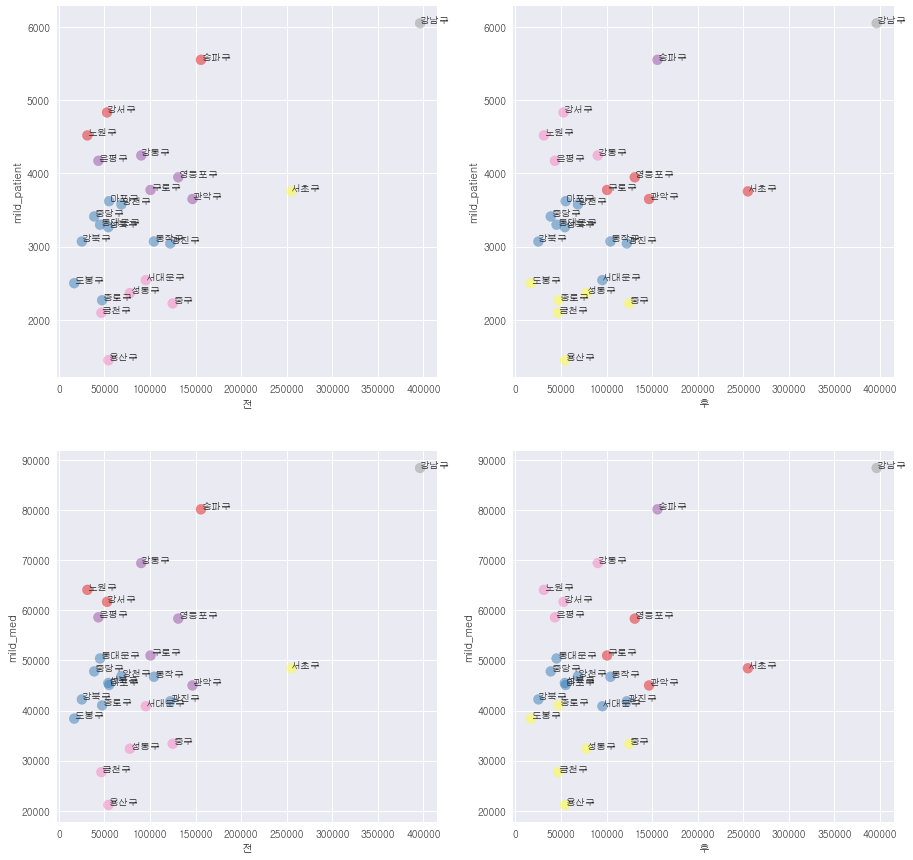

In [61]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


np.random.seed(0)
x = test_selected['floating_tot']
y = test_selected['mild_patient']
annotations = test_selected['gu']
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(x, y, s = 100, c = test_selected['cluster'], marker = 'o', alpha = 0.5, cmap = 'Set1')
ax1.set_xlabel('전')
ax1.set_ylabel('mild_patient')
for i, label in enumerate(annotations):   
    plt.annotate(label, (x[i], y[i]),size=10)
    
x = test_selected['floating_tot']
y = test_selected['mild_patient']
annotations = test_selected['gu']
ax1 = fig.add_subplot(2,2,2)
ax1.scatter(x, y, s = 100, c = test_selected['cluster_non_area'], marker = 'o', alpha = 0.5, cmap = 'Set1')
ax1.set_xlabel('후')
ax1.set_ylabel('mild_patient')
for i, label in enumerate(annotations):   
    plt.annotate(label, (x[i], y[i]),size=10)

x = test_selected['floating_tot']
y = test_selected['mild_med']
annotations = test_selected['gu']
ax2 = fig.add_subplot(2,2,3)
ax2.scatter(x, y, s = 100, c = test_selected['cluster'], marker = 'o', alpha = 0.5, cmap = 'Set1')
ax2.set_xlabel('전')
ax2.set_ylabel('mild_med')
for i, label in enumerate(annotations):   
    plt.annotate(label, (x[i], y[i]),size=10)
    

x = test_selected['floating_tot']
y = test_selected['mild_med']
annotations = test_selected['gu']
ax2 = fig.add_subplot(2,2,4)
ax2.scatter(x, y, s = 100, c = test_selected['cluster_non_area'], marker = 'o', alpha = 0.5, cmap = 'Set1')
ax2.set_xlabel('후')
ax2.set_ylabel('mild_med')
for i, label in enumerate(annotations):   
    plt.annotate(label, (x[i], y[i]),size=10)


* area 변수를 제거해도 성능에 큰 변화는 없었음 오히려 좋아지는 경향을 보임

## 최종 데이터 셋

In [62]:
test_fin = test_selected.drop(['cluster','area'],axis=1)
test_fin.to_csv("SGG_Clustering.csv",encoding='EUC-KR')


### 간단한 EDA (클러스터 별 경향)
* 5번 클러스터 - 강남구(1개) : 유동인구와 경증환자,약재비등이 모두 높은 경향을 보임
* 2번 클러스터 - 송파구(1개) : 강남구 만큼은 아니지만, 대체적으로 모든 변수가 상위권
* 4번 클러스터 - 강동,노원,강서,은평(4개) :유동인구는 낮은편이지만, 경증 환자 수가 높은 그룹
* 0번 클러스터 - 영등포,구로,서초,관악(4개) : 4번클러스터 대비 유동인구가 크지만, 경증환자수가 적은 그룹
* 1번 클러스터 - 마포,양천,중랑,동대문,성북,동작,강북,광진,서대문(9개) : 0번과 비슷하나, 상대적으로 유동인구가 적다
* 3번 클러스터 - 종로 도봉 중구 성동 금천 용산(6개) :경증환자수,경증환자약재비가 가장 적은 그룹

* 대체로 경증환자수를 기준으로 클러스터가 나뉜 경향을 보였으며, 유동인구수와 경증환자 약재비도 영향을 미침

In [65]:
test_fin.sort_values('mild_patient',ascending=False)

,floating_tot,mild_patient,mild_med,gu,cluster_non_area
0,396479.56353,6047.40000,88391.40000,강남구,5
17,155933.69788,5548.60000,80149.80000,송파구,2
3,52865.37851,4831.00000,61688.40000,강서구,4
8,31253.37608,4517.20000,64074.60000,노원구,4
1,90378.89592,4244.20000,69424.80000,강동구,4
21,43359.92890,4170.60000,58592.20000,은평구,4
19,131010.94453,3946.20000,58334.80000,영등포구,0
6,100587.71952,3773.20000,50974.60000,구로구,0
14,255119.22215,3754.20000,48437.80000,서초구,0
4,146665.36291,3649.60000,45004.60000,관악구,0
